# Inciso 3. Presentación del problema

Tu eres un científico de las relaciones1, y has desarrollado un cuestionario que determina el puntaje de amor, es decir, un valor real entre cero y cien. Tu teoría es que dos personas con puntajes de amor similares deberían de hacer un buen match.
Dado los puntajes del amor para 10 personas distintas, crea un arreglo 2-D donde cada entrada (i, j) da la diferencia absoluta entre los puntajes del amor de la persona i y la persona j.
Hint: Recuerda revisar np.random.
1Cupido

# Procedimiento

## Primero importaremos Numpy

In [5]:
import numpy as np

## Plantamos una semilla para reproducibilidad

In [7]:
np.random.seed(123)

## Generamos puntajes para 10 personas distintas

In [9]:
puntajes_amor = np.random.randint(1, 100, size=10)
print(puntajes_amor)

In [11]:
print(puntajes_amor[:, np.newaxis])

[[67]
 [93]
 [99]
 [18]
 [84]
 [58]
 [87]
 [98]
 [97]
 [48]]


## Vamos a crear la matrix usando broadcasting

In [13]:
matriz_diferencias = np.abs(puntajes_amor[:, np.newaxis] - puntajes_amor)
print(matriz_diferencias)

[[ 0 26 32 49 17  9 20 31 30 19]
 [26  0  6 75  9 35  6  5  4 45]
 [32  6  0 81 15 41 12  1  2 51]
 [49 75 81  0 66 40 69 80 79 30]
 [17  9 15 66  0 26  3 14 13 36]
 [ 9 35 41 40 26  0 29 40 39 10]
 [20  6 12 69  3 29  0 11 10 39]
 [31  5  1 80 14 40 11  0  1 50]
 [30  4  2 79 13 39 10  1  0 49]
 [19 45 51 30 36 10 39 50 49  0]]


# Resultados

## Usando la matriz podemos crear un mapa de calor

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

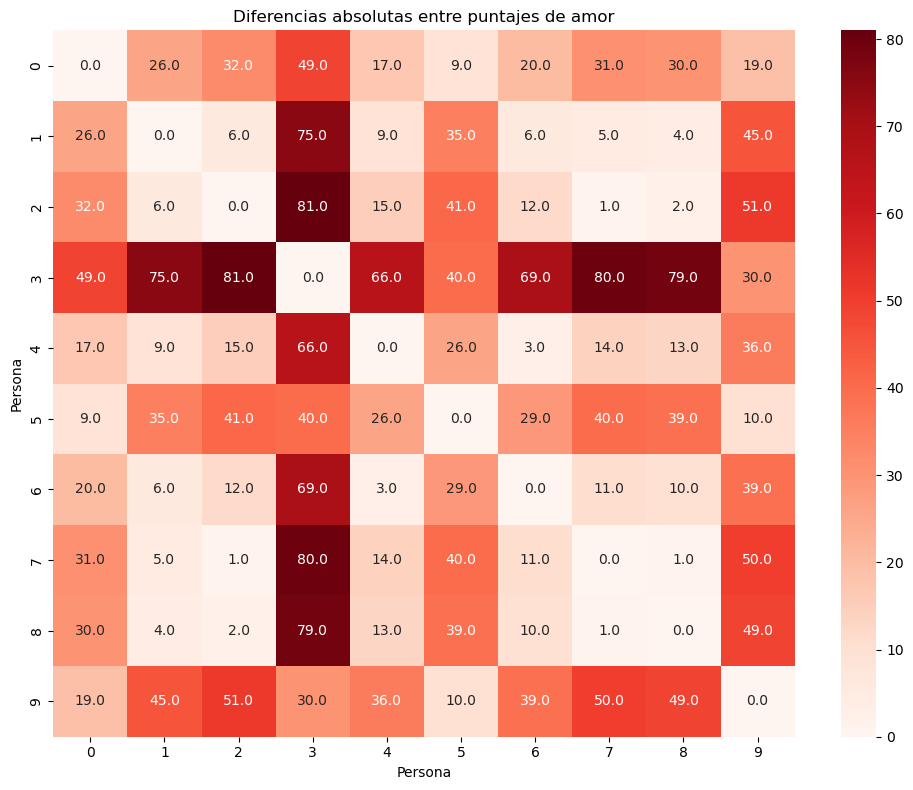

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_diferencias, annot=True, fmt=".1f", cmap="Reds")
plt.title("Diferencias absolutas entre puntajes de amor")
plt.xlabel("Persona")
plt.ylabel("Persona")
plt.tight_layout()
plt.show()

In [17]:
def lanzar_flecha_cupido(matriz_diferencias, n_parejas=10):
    # Creamos una copia de la matriz
    mat_copy = matriz_diferencias.copy()
    
    # Usamos un valor muy grande en lugar de infinito
    valor_max = matriz_diferencias.max() * 1000  # O simplemente un número grande como 9999
    np.fill_diagonal(mat_copy, valor_max)
    
    # El resto de la función sigue igual
    mejores_parejas = []
    for _ in range(n_parejas):
        min_valor = np.min(mat_copy)
        min_pos = np.where(mat_copy == min_valor)
        i, j = min_pos[0][0], min_pos[1][0]
        mejores_parejas.append((i, j, min_valor))
        mat_copy[i, j] = valor_max
        mat_copy[j, i] = valor_max
    
    mejores_parejas.sort(key=lambda x: x[2])
    return mejores_parejas

In [19]:
def mostrar_resultados_cupido(puntajes_amor, mejores_parejas):
    """
    Muestra los resultados de las parejas encontradas de manera visualmente atractiva.
    """
    print("🏹 RESULTADOS DE LA FLECHA DE CUPIDO 🏹")
    print("=" * 50)
    print("\nPuntajes de amor individuales:")
    for i, puntaje in enumerate(puntajes_amor):
        print(f"💘 Persona {i+1}: {puntaje:.1f}")
    
    print("\n❤️ MEJORES MATCHES POTENCIALES ❤️")
    print("-" * 50)
    for i, (p1, p2, diff) in enumerate(mejores_parejas):
        print(f"{i+1}. Persona {p1+1} ({puntajes_amor[p1]:.1f}) + Persona {p2+1} ({puntajes_amor[p2]:.1f}) = Diferencia: {diff:.1f}")
    

In [21]:
# Después de generar puntajes_amor y matriz_diferencias
mejores_parejas = lanzar_flecha_cupido(matriz_diferencias)
mostrar_resultados_cupido(puntajes_amor, mejores_parejas)

🏹 RESULTADOS DE LA FLECHA DE CUPIDO 🏹

Puntajes de amor individuales:
💘 Persona 1: 67.0
💘 Persona 2: 93.0
💘 Persona 3: 99.0
💘 Persona 4: 18.0
💘 Persona 5: 84.0
💘 Persona 6: 58.0
💘 Persona 7: 87.0
💘 Persona 8: 98.0
💘 Persona 9: 97.0
💘 Persona 10: 48.0

❤️ MEJORES MATCHES POTENCIALES ❤️
--------------------------------------------------
1. Persona 3 (99.0) + Persona 8 (98.0) = Diferencia: 1.0
2. Persona 8 (98.0) + Persona 9 (97.0) = Diferencia: 1.0
3. Persona 3 (99.0) + Persona 9 (97.0) = Diferencia: 2.0
4. Persona 5 (84.0) + Persona 7 (87.0) = Diferencia: 3.0
5. Persona 2 (93.0) + Persona 9 (97.0) = Diferencia: 4.0
6. Persona 2 (93.0) + Persona 8 (98.0) = Diferencia: 5.0
7. Persona 2 (93.0) + Persona 3 (99.0) = Diferencia: 6.0
8. Persona 2 (93.0) + Persona 7 (87.0) = Diferencia: 6.0
9. Persona 1 (67.0) + Persona 6 (58.0) = Diferencia: 9.0
10. Persona 2 (93.0) + Persona 5 (84.0) = Diferencia: 9.0
